# GRIP @ THE SPARKS FOUNDATION
# TASK-1 Predection using Supervised ML

Name- Anjali Sonawane, Batch- July 2022

Predict the percentage of an student based on the no. of study hours.What will be predicted score if a student studies for 9.25 hrs/day.Use R, Python, SAS Enterprise Miner or any other tool.

# Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score 
based upon the number of hours they studied. This is a simple linear regression task as it involves 
just two variables.

Libraries used: Pandas, Numpy, Matplotlib, Seaborn, Scikit-learn.

# Importing all required libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Data Preprocessing

In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

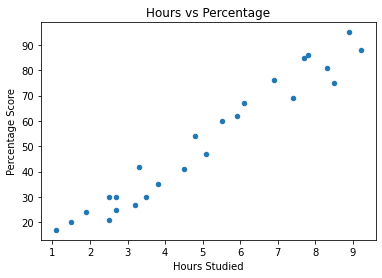

In [8]:
df.plot(kind="scatter",x="Hours",y="Scores")
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Model Building

In [9]:
X = df[['Hours']]
y = df['Scores']

Splitting The dataset into train and test data.

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression 

In [12]:
regressor = LinearRegression() 

In [13]:
regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = regressor.predict(X_test)

Testing score

In [15]:
regressor.score(X_train,y_train)

0.9515510725211552

Testing score

In [16]:
regressor.score(X_test,y_test)

0.9454906892105356

In [17]:
print(regressor.coef_)

[9.91065648]


In [18]:
print(regressor.intercept_)

2.018160041434683


In [19]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import math

In [20]:
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred))

Mean Absolute Error : 4.183859899002975


In [21]:
print('Mean Squared Error :',mean_squared_error(y_test,y_pred))

Mean Squared Error : 21.5987693072174


In [22]:
print('Root Mean Squared Error :',math.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Squared Error : 4.6474476121003665


In [23]:
print('Linear R2: ', r2_score(y_test, y_pred))

Linear R2:  0.9454906892105356


Making Predictions

 Here we are predicting how much does he/she will score if he/she will study for 9.25hrs in a day

In [24]:
hours=9.25
pred = regressor.predict([[hours]])
print('Number of hours = {}' .format(hours))
print('Predicted Score = {}' .format(pred[0]))

Number of hours = 9.25
Predicted Score = 93.69173248737538


# SVM Regressor

In [25]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')

In [26]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [27]:
y_svm_pred = svr.predict(X_test)

In [28]:
y_svm_pred

array([20.32500005, 35.51875017, 73.05625045, 29.26250012, 59.65000035])

Testing Score

In [29]:
svr.score(X_test,y_test)

0.9519511904055161

In [30]:
print('SVR R2: ', r2_score(y_test, y_svm_pred))

SVR R2:  0.9519511904055161


In [31]:
svm_mse = math.sqrt(mean_squared_error(y_test,y_svm_pred))

In [32]:
print("SVM model Root Mean Square Error :",svm_mse)

SVM model Root Mean Square Error : 4.363354250312286


# KNN Regressor

In [33]:
from sklearn.neighbors import KNeighborsRegressor

In [34]:
knn_regressor=KNeighborsRegressor(n_neighbors = 5)
knn_model=knn_regressor.fit(X_train,y_train)
y_knn_pred=knn_model.predict(X_test)

In [35]:
knn_model.score(X_test,y_test)

0.9095093882495457

In [36]:
knn_mse=math.sqrt(mean_squared_error(y_test,y_knn_pred))
print('KNN Model Root mean square error',knn_mse)

KNN Model Root mean square error 5.987987975939829


In [37]:
print('KNN R2: ', r2_score(y_test, y_knn_pred))

KNN R2:  0.9095093882495457
